In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/Bases de Dados/All.csv',delimiter ='\t')

In [ ]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,category,sub_category,product_name,price,customer_name,segment,country,city,state,postal_code,region
0,CA-2017-152156,06/02/2022,09/02/2022,Second Class,CG-12520,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,130.98,Claire Gute,Consumer,United States,Dallas,Texas,75217.0,Central
1,CA-2017-152156,06/02/2022,09/02/2022,Second Class,CG-12520,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",170.79,Claire Gute,Consumer,United States,Dallas,Texas,75217.0,Central
2,CA-2017-138688,10/09/2021,14/09/2021,Second Class,DV-13045,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,7.31,Darrin Van Huff,Corporate,United States,Jacksonville,Florida,32216.0,South
3,US-2016-108966,09/01/2021,16/01/2021,Standard Class,SO-20335,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,191.52,Sean O'Donnell,Consumer,United States,Columbia,Tennessee,38401.0,South
4,US-2016-108966,09/01/2021,16/01/2021,Standard Class,SO-20335,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,13.98,Sean O'Donnell,Consumer,United States,Columbia,Tennessee,38401.0,South


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9795 entries, 0 to 9794
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       9795 non-null   object 
 1   order_date     9795 non-null   object 
 2   ship_date      9795 non-null   object 
 3   ship_mode      9795 non-null   object 
 4   customer_id    9795 non-null   object 
 5   product_id     9795 non-null   object 
 6   category       9795 non-null   object 
 7   sub_category   9795 non-null   object 
 8   product_name   9795 non-null   object 
 9   price          9795 non-null   float64
 10  customer_name  9795 non-null   object 
 11  segment        9795 non-null   object 
 12  country        9795 non-null   object 
 13  city           9795 non-null   object 
 14  state          9795 non-null   object 
 15  postal_code    9742 non-null   float64
 16  region         9795 non-null   object 
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,price,postal_code
count,9795.000000,9742.000000
mean,101.759532,54166.230240
std,381.081159,25727.921756
min,0.440000,1810.000000
25%,7.780000,31907.000000
50%,22.700000,60505.000000
75%,89.580000,77070.000000
max,22638.480000,98226.000000


#Visualização de Dados

##Matplotlib

In [ ]:
#Importante biblioteca
import matplotlib.pyplot as plt 

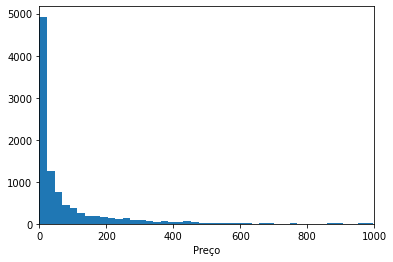

In [ ]:
#Histograma
plt.hist(df['price'], bins=1000)
plt.xlim(0, 1000) #define os limites para o eixo x
plt.xlabel('Preço') #define o título para o eixo x
plt.ylabel('Frequência') #define o título para o eixo y
plt.show() #assim como o print, imprime a imagem

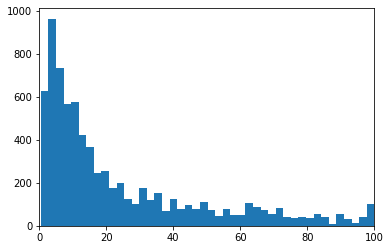

In [ ]:
#Analisando com limites diferentes
plt.hist(df['price'], bins=10000)
plt.xlim(0, 100)
plt.show() #como o print, imprime a imagem

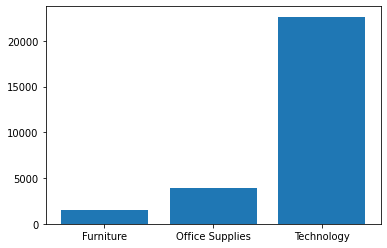

In [ ]:
# Gráfico de barras
plt.bar(df['category'],df['price'])
plt.show()

###Subplots

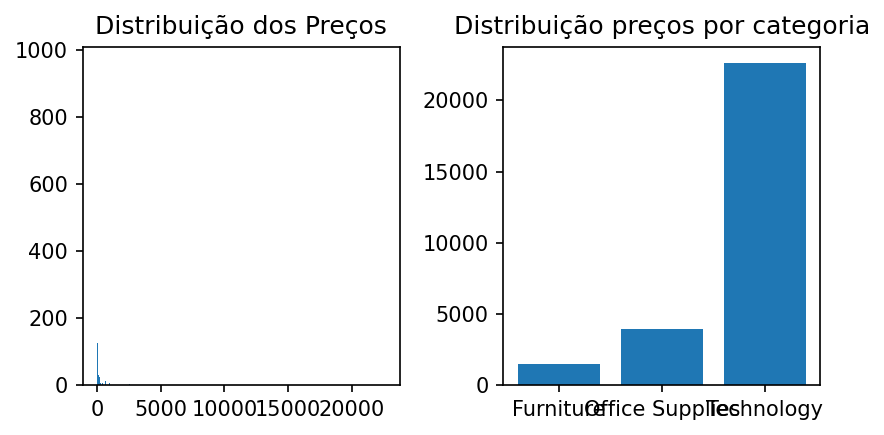

In [ ]:
#Outra forma de fazer os subplots

f, ax = plt.subplots(1,2, figsize=(6,3), dpi=150) # 1 linha, 2 colunas
ax[0].hist(df['price'], bins=10000)
ax[0].set_title('Distribuição dos Preços')

ax[1].bar(df['category'],df['price'])
ax[1].set_title('Distribuição preços por categoria')

plt.tight_layout()
plt.show()

##Seaborn

In [ ]:
import seaborn as sns #menos código

In [ ]:
df['segment'].value_counts()

Consumer       5096
Corporate      2953
Home Office    1746
Name: segment, dtype: int64

###pie e countplot

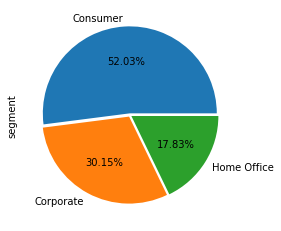

In [ ]:
df['segment'].value_counts().plot.pie(explode=[0.02,0.02,0.02], autopct='%0.2f%%'); #explode= margem de distancia das "fatias"

###countplot e hue

In [ ]:
df.loc[df['price'] <= 100, 'Faixa'] = '<=100'
df.loc[df['price'] >= 100, 'Faixa'] = '>=100'

In [ ]:
df['Faixa'].tail()

9790    <=100
9791    <=100
9792    >=100
9793    <=100
9794    <=100
Name: Faixa, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


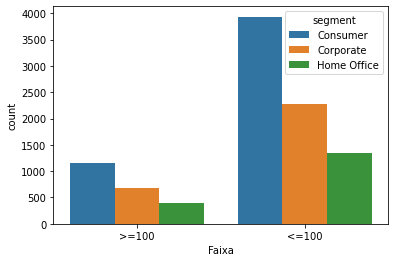

In [ ]:
sns.countplot('Faixa', hue='segment', data=df); #hue=separação

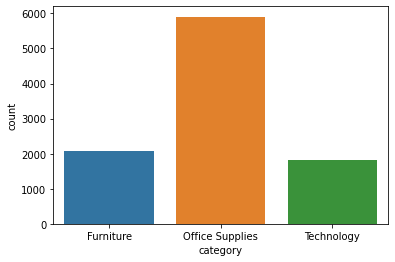

In [ ]:
sns.countplot(data=df, x='category') #contando por categoria de produto

In [ ]:
#Correlação
correlation = df.corr()

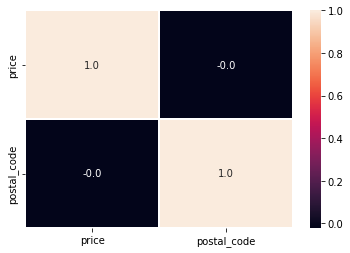

In [ ]:
plot = sns.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)

In [ ]:
"""dados: conjunto de dados 2D que pode ser coagido em um ndarray.
vmin , vmax: Valores para ancorar o mapa de cores, caso contrário, eles são inferidos dos dados e de outros argumentos de palavra-chave.
cmap: O mapeamento de valores de dados para espaço de cores.
center: O valor no qual centralizar o mapa de cores ao plotar dados divergentes.
annot: se True, escreva o valor dos dados em cada célula.
fmt: código de formatação de string a ser usado ao adicionar anotações.
linewidths: Largura das linhas que irão dividir cada célula.
linecolor: cor das linhas que irão dividir cada célula.
cbar: se deve desenhar uma barra de cores."""

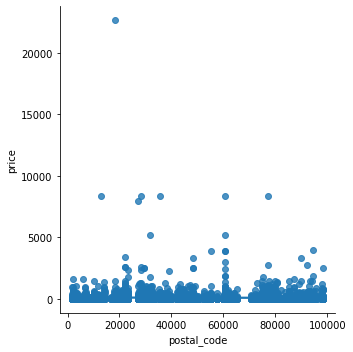

In [ ]:
#Dispersão e regressão linear
sns.lmplot(data=df, x='postal_code', y= 'price')

###Boxplot

In [ ]:
df[].value_counts()

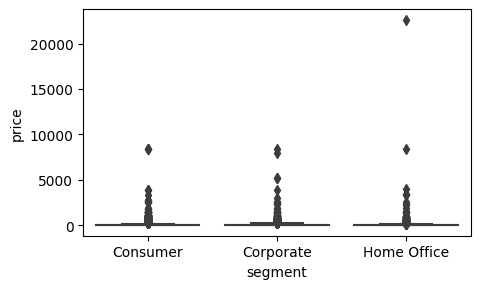

In [ ]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='segment', y='price', data=df);

In [ ]:
df_1 = df.loc[df['price']<100]

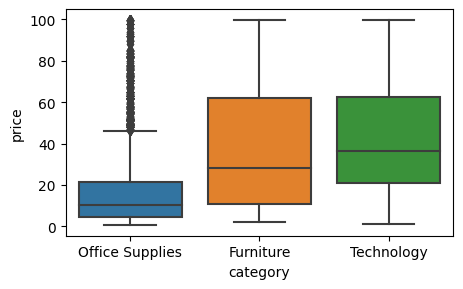

In [ ]:
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(x='category', y='price', data=df_1);

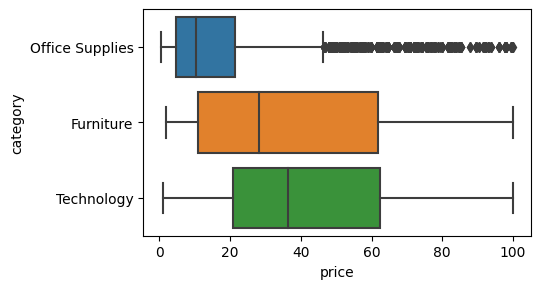

In [ ]:
#Visualização horizontal
plt.figure(figsize=(5,3), dpi=100)
sns.boxplot(data=df_1, x='price', y='category', orient='h');

###violinplot

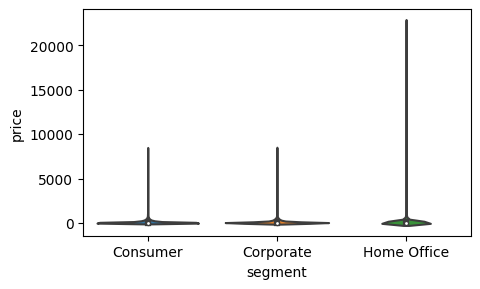

In [ ]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='segment',y='price', data=df) #basicamente a mesma coisa boxplot, mas nos atenta com as caudas

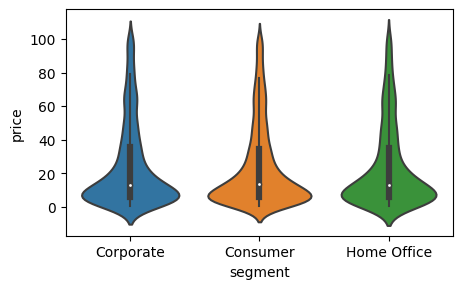

In [ ]:
plt.figure(figsize=(5,3), dpi=100)
sns.violinplot(x='segment',y='price', data=df_1);

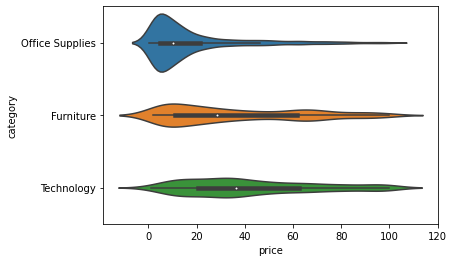

In [ ]:
sns.violinplot(data=df_1, x='price', y='category', orient='h');

###FacetGrid

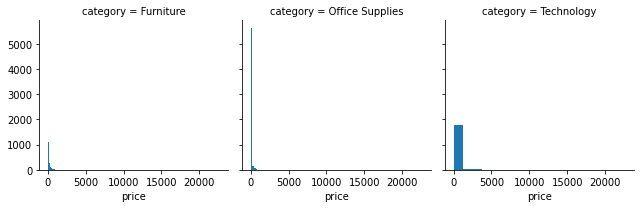

In [ ]:
#Multiplos gráficos no mesmo canvas = gráficos inteligentes
g = sns.FacetGrid(df, col='category')
g.map(plt.hist, 'price', bins=18);

###Scatterplot

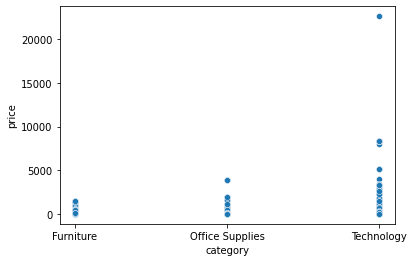

In [ ]:
sns.scatterplot(x='category', y='price',
               palette='magma', data=df, sizes=(10, 200))

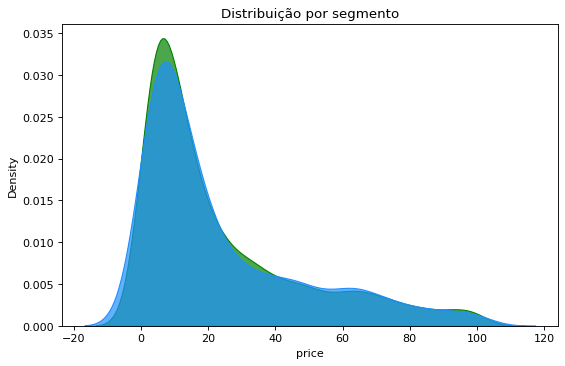

In [ ]:
plt.figure(figsize=(8,5), dpi=80)
sns.kdeplot(df_1['price'].loc[df['segment']=='Consumer'], shade=True, 
            color='g', label='Cap', alpha=0.7)
sns.kdeplot(df_1['price'].loc[df['segment']=='Corporate segment'], shade=True, 
            color='deeppink', label='Met', alpha=0.7)
sns.kdeplot(df_1['price'].loc[df['segment']=='Home Office'], shade=True, 
            color='dodgerblue', label='Int', alpha=0.7)
plt.title('Distribuição por segmento')
plt.show()

In [ ]:
df_2 = df_1.groupby(['segment','category']).mean()

In [ ]:
df_2.drop('postal_code',axis=1,inplace=True)

###Dados Artificiais

In [ ]:
import numpy as np

In [ ]:
x = np.random.normal(10, 1, 15) # criando 15 elementos, com média 10, e desvio padrão 1

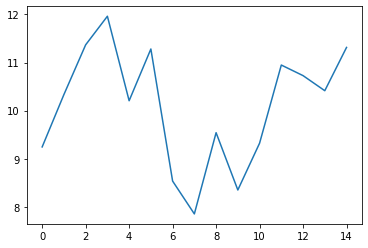

In [ ]:
#plot
plt.plot(x);

In [ ]:
#linspace
x = np.linspace(0,20,1000) # criando 1000 numeros igualmente espaçados num intervalo de 0 a 20

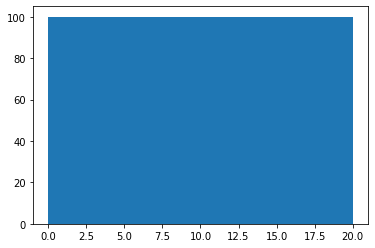

In [ ]:
plt.hist(x)
plt.show()

In [ ]:
y = 2*x - 5 # equação do primeiro grau

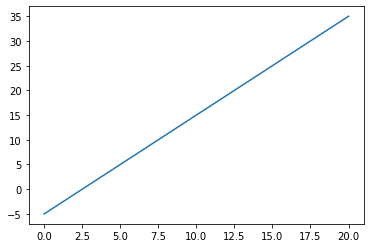

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
y = 2*x**2 - 5*x +3 # equação do segundo grau

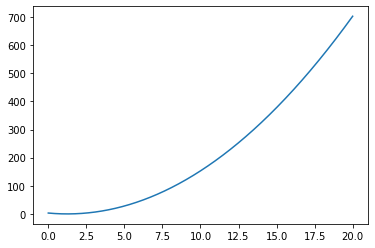

In [ ]:
plt.plot(x,y)
plt.show()

In [ ]:
y = 2*x**3 + 2*x**2 - 5*x +3 # equação do terceiro grau

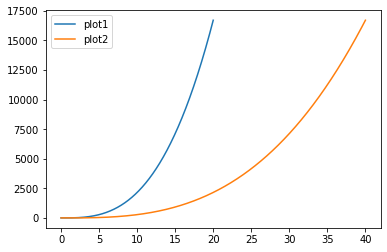

In [ ]:
plt.plot(x,y, label='plot1')
plt.plot(x*2,y, label='plot2')

plt.legend()
plt.show()

In [ ]:
#normal
y = np.random.normal(8,2,1000) # criando 1000 elementos normalmente distribuidos, com uma média 8 e um desvio padrão de 2

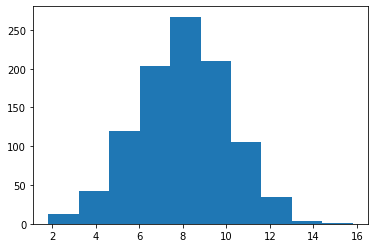

In [ ]:
plt.hist(y)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


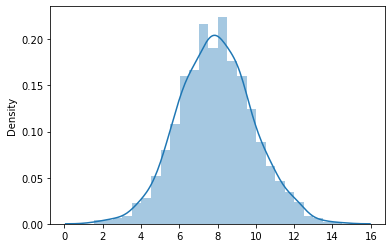

In [ ]:
sns.distplot(y)
plt.show()

https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#1.-Scatter-plot